In [1]:
import pandas as pd
import numpy as np
dunge_data_path = "../data/46088/"
neah_data_path = "../data/46087/"

## Spectral Wave Density (swden)
Energy in $\frac{meter\cdot meter}{Hz}$ for each frequency bin from 0.0200 Hz to 0.4850 Hz


In [2]:
dunge_swden = pd.read_pickle(dunge_data_path + "swden.pkl")
neah_swden = pd.read_pickle(neah_data_path + "swden.pkl")

### Plotting

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (6, 4)

In [4]:
def date_mask(df, start_date, end_date):
    return df[(df.index > start_date) & (df.index <= end_date)] 

#### 1. Plotting mean swden for Neah Bay and New Dungeness
1. Neah Bay has way higher *Spectral Densities*.  This is expected.
2. New Dunge has a wider distribution of *Frequencies*.
3. There is a small but clear bump in New Dunge around 0.5 Hz to 0.15 Hz, right at the frequency peak for Neah Bay.  *Hypothesis*: This is the swell making it from the ocean to New Dunge!

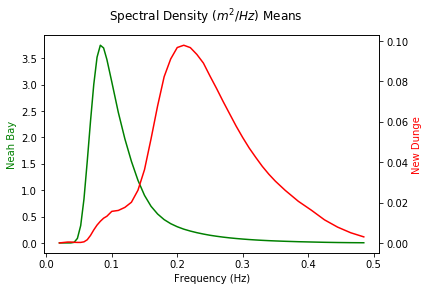

In [5]:
hz_vals = [float(hz) for hz in list(dunge_swden)]
neah_avgs = neah_swden.sum(axis=0)/len(neah_swden)
dunge_avgs = dunge_swden.sum(axis=0)/len(dunge_swden)

def plot_swdens(dunge, neah, title):
    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()
#     ax1.set_xscale('log')
#     ax2.set_xscale('log')
    ax1.plot(hz_vals, neah, 'g-')
    ax2.plot(hz_vals, dunge, 'r-')
    ax1.set_ylabel('Neah Bay', color='g')
    ax2.set_ylabel('New Dunge', color='r')
    fig.suptitle("Spectral Density $(m^2/Hz)$ " + title)
    ax1.set_xlabel('Frequency (Hz)')
    
plot_swdens(dunge_avgs, neah_avgs, "Means")

#### 2. Separate spectral density by frequency bins and compare
1. Spectral density axes (range of values) for Neah and Dunge are similar in frequency bins > 0.15 Hz.
     * Below 0.15 Hz, magnitude of Neah densities dramatically *increase*
     * Below 0.12 Hz, magnitude of Dunge densities dramatically *decrease*
     * Probably because Neah gets way more swell (lower densities), while they get similar amounts of wind (higher densities)
2. The lowest frequencies (< 0.0875 for Dunge) seem to have random blips - magnitudes are low, could be instrument or data processing error
3. The largest frequency *magnitudes* for Dunge are in the 0.12 - 0.19 Hz range.  Higher frequencies have more values and noise, but lower "highest magnitudes." AKA there is wind more of the time, but it produces lower spectral densities.

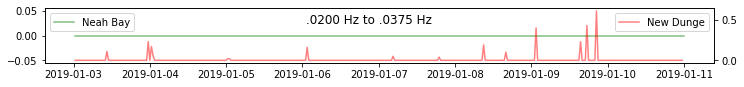

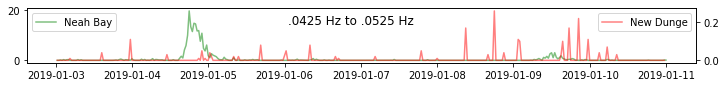

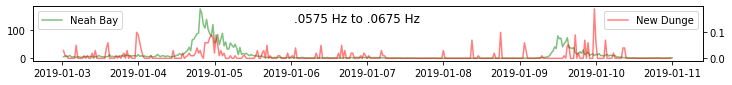

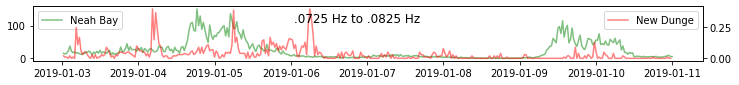

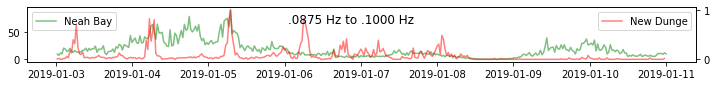

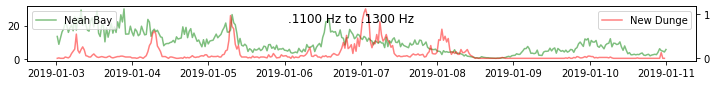

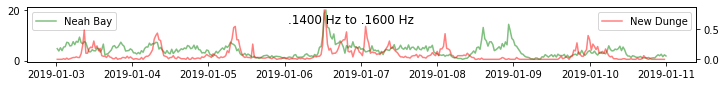

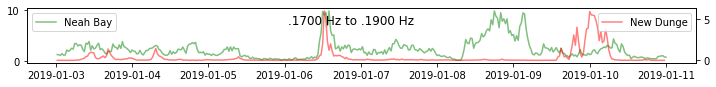

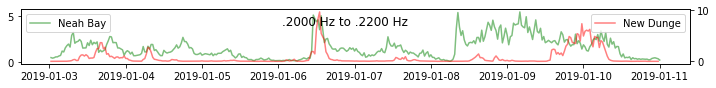

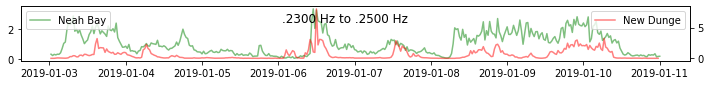

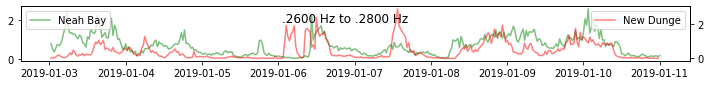

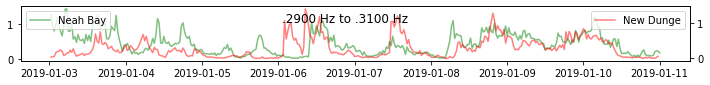

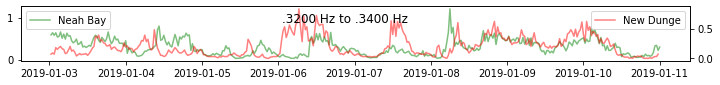

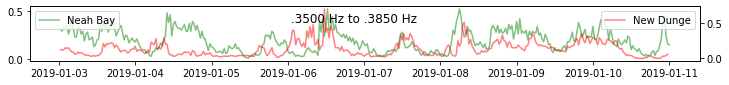

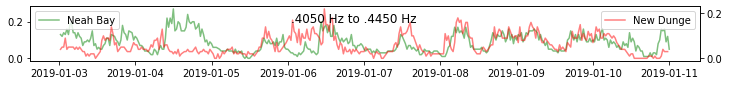

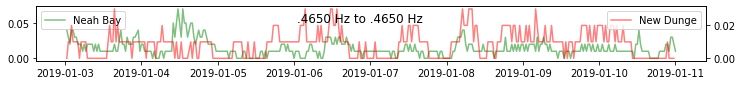

In [16]:
num_cols = len(dunge_swden.columns)
def freq_plot(start_date, end_date, start_freq, n_freqs, sep_neah_freqs=True):
    end_freq = (start_freq + n_freqs) if start_freq + n_freqs < num_cols else num_cols-1
    
    neah = date_mask(neah_swden, start_date, end_date)
    if sep_neah_freqs:
        neah = neah.iloc[:,start_freq:end_freq]
    neah = neah.sum(axis=1)
    dunge = date_mask(dunge_swden, start_date, end_date)
    dunge = dunge.iloc[:,start_freq:end_freq].sum(axis=1)
    
    fig, ax1 = plt.subplots(figsize=(12,1))
    ax2 = ax1.twinx()
    ax1.plot(neah, 'g-', alpha=0.5, label="Neah Bay")
    ax2.plot(dunge, 'r-', alpha=0.5, label="New Dunge")
    ax1.legend(loc="upper left")
    ax2.legend(loc="upper right")
    plt.suptitle(str(dunge_swden.columns[start_freq]) + " Hz to " +
                 str(dunge_swden.columns[end_freq-1]) + " Hz", y=0.8)
    plt.show()

freqs_per_bin = 3
start, end = '2019-01-03 00:00:00', '2019-01-11 00:00:00'
for s in range(0, num_cols, freqs_per_bin):
    freq_plot(start, end, s, freqs_per_bin)

#### 3. *n* hours of spectral wave densities
* (start, n, step): in hours
* (0, 20, 1): The difference between New Dunge Swell and Seas seems obvious - ~ 0.15 Hz

In [21]:
start, n, step = 0, 20, 1

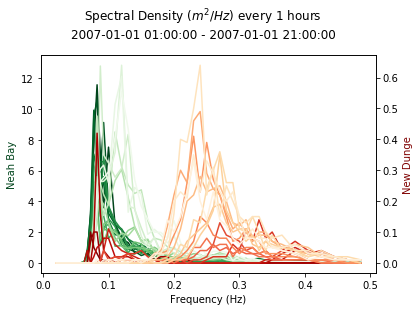

In [22]:
import matplotlib.pylab as pl

n_clrs = pl.cm.Greens(np.linspace(0,1,n))
d_clrs = pl.cm.OrRd(np.linspace(0,1,n))

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
for t in range(0, n*step, step):
    ax1.plot(hz_vals, neah_swden.iloc[start+t, :], color=n_clrs[-int(t/step)])
    ax2.plot(hz_vals, dunge_swden.iloc[start+t, :], color=d_clrs[-int(t/step)])
ax1.set_ylabel('Neah Bay', color=n_clrs[-1])
ax2.set_ylabel('New Dunge', color=d_clrs[-1])
fig.suptitle("Spectral Density $(m^2/Hz)$ every " + str(step) + " hours\n" + str(dunge_swden.index[start]) + " - " + str(dunge_swden.index[start + n*step]),
             y = 1.05)
ax1.set_xlabel('Frequency (Hz)')
plt.show()

#### 4. Try using a Separation Frequency (fs)

In [23]:
fs_col = 15
fs = ("Separation Frequency: " + str(list(dunge_swden)[fs_col]) +
      "  Separation Period: " + str(1/float(list(dunge_swden)[fs_col])))
print(fs)

Separation Frequency: .1100  Separation Period: 9.090909090909092


In [24]:
dunge_swell_sums = dunge_swden.iloc[:,:fs_col].sum(axis=1)
dunge_sea_sums = dunge_swden.iloc[:,fs_col:].sum(axis=1)
neah_swell_sums = neah_swden.iloc[:,:fs_col].sum(axis=1)
neah_sea_sums = neah_swden.iloc[:,fs_col:].sum(axis=1)
neah_all_sums = neah_swden.sum(axis=1)
dunge_all_sums = dunge_swden.sum(axis=1)

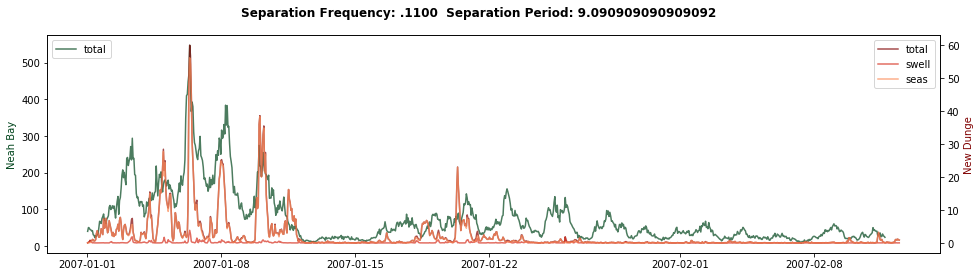

In [30]:
start = 0
n = 1000

n_clrs = pl.cm.Greens(np.linspace(0,1,5))
d_clrs = pl.cm.OrRd(np.linspace(0,1,5))

fig, ax1 = plt.subplots(figsize=(16,4))
ax2 = ax1.twinx()

### All Sums
ax1.plot(neah_all_sums[start:start+n], color=n_clrs[-1], alpha=0.7, label="total")
ax2.plot(dunge_all_sums[start:start+n], color=d_clrs[-1], alpha=0.7, label="total")
### Sums broken apart by fs
#ax1.plot(neah_swell_sums[start:start+n], color=n_clrs[-2], alpha=0.7, label="swell")
#ax1.plot(neah_sea_sums[start:start+n], color=n_clrs[-3], alpha=0.7, label="seas")
ax2.plot(dunge_swell_sums[start:start+n], color=d_clrs[-2], alpha=0.7, label="swell")
ax2.plot(dunge_sea_sums[start:start+n], color=d_clrs[-3], alpha=0.7, label="seas")

ax1.set_ylabel('Neah Bay', color=n_clrs[-1])
ax1.legend(loc="upper left")
ax2.set_ylabel('New Dunge', color=d_clrs[-1])
ax2.legend(loc="upper right")
plt.suptitle(fs, weight='bold')
plt.show()

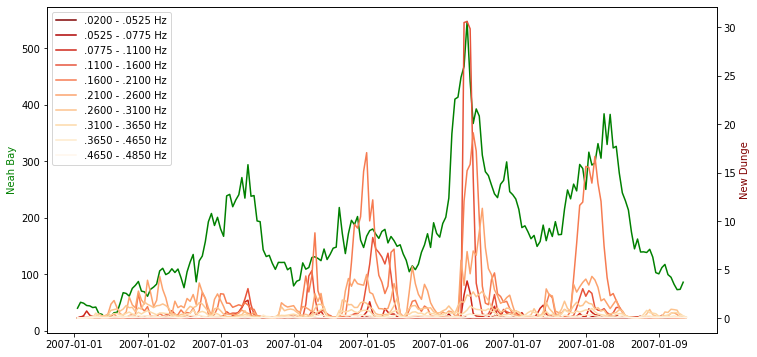

In [26]:
col_names = neah_swden.columns
total = len(col_names)

def freq_plot(n_freqs_per, freqs_step, time_i, time_n):
#     neah = neah_swden.iloc[:,start_col:start_col+n_cols].sum(axis=1)
    d_clrs = pl.cm.OrRd(np.linspace(0,1,int(total/freqs_step)+1))
    time_j = time_i+time_n
    
    neah = neah_swden.sum(axis=1)
    fig, ax1 = plt.subplots(figsize=(12,6))
    ax1.plot(neah[time_i:time_j], 'g-')
    ax1.set_ylabel('Neah Bay', color='g')
    ax2 = ax1.twinx()
    ax2.set_ylabel('New Dunge', color=d_clrs[-1])
    c = 1
    for col_i in range(0, total, freqs_step):
        col_j = col_i+n_freqs_per
        dunge = dunge_swden.iloc[:,col_i:col_j].sum(axis=1)
        ax2.plot(dunge[time_i:time_j], color=d_clrs[-c],
                 label=str(col_names[col_i]) + " - " + str(col_names[col_j if col_j < total else total-1]) + " Hz")
        c+=1
    ax2.legend()

freq_plot(5, 5, 0, 200)

#### 4. Adding current/wind
* **current** -- doesn't align with tides very well?
    * *direction*: direction the ocean current is flowing **toward**, measured in degrees clockwise from North
    * *speed*: speed of the ocean current measured in cm/s

In [27]:
dunge_curr = pd.read_pickle(dunge_data_path + "adcp.pkl")
dunge_curr.head(5)

,current_depth,current_direction,current_speed
2007-03-01 00:00:00,2,233,61.4
2007-03-01 00:30:00,2,242,59.7
2007-03-01 01:00:00,2,248,57.1
2007-03-01 01:30:00,2,246,64
2007-03-01 02:00:00,2,258,57.4


In [28]:
def mask(df, start_date, end_date):
    return df[(df.index > start_date) & (df.index <= end_date)]

W=270
def current_from_west(df):
    return [abs(W-c) if c>90 else c+90 for c in df]

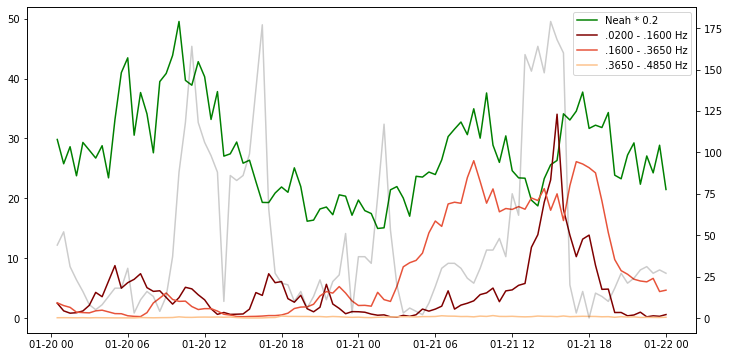

In [29]:
col_names = neah_swden.columns
total = len(col_names)

def freq_plot(n_freqs_per, freqs_step, start_date, end_date, neah_factor):
    d_clrs = pl.cm.OrRd(np.linspace(0,1,int(total/freqs_step)+2))
    neah = mask(neah_swden, start_date, end_date).sum(axis=1)*neah_factor
    dunge = mask(dunge_swden, start_date, end_date)
    current = mask(dunge_curr, start_date, end_date)['current_direction']
    
    fig, ax1 = plt.subplots(figsize=(12,6))
    ax2 = ax1.twinx()
    
    ax1.plot(neah, 'g-', label="Neah * " + str(neah_factor))
    ax2.plot(current.index, current_from_west(current), color='black', alpha=0.2)
    
    c = -1
    for col_i in range(0, total, freqs_step):
        col_j = col_i+n_freqs_per
        ax1.plot(dunge.iloc[:,col_i:col_j].sum(axis=1), color=d_clrs[c],
                 label=str(col_names[col_i]) + " - " + str(col_names[col_j if col_j < total else total-1]) + " Hz")
        c-=1
    ax1.legend()

freq_plot(20, 20, '2018-01-20 00:00:00', '2018-01-22 00:00:00', 0.2)

In [64]:
a = pd.read_pickle("../d/adsf")

FileNotFoundError: [Errno 2] No such file or directory: '../d/adsf'

In [63]:
a = None
b = None
c = 2
if not (a or (b and c)):
    print("a")

a


In [32]:
"https://www.ndbc.noaa.gov/view_text_file.php?filename={}.txt.gz&dir=data/historical//".format(4)

'https://www.ndbc.noaa.gov/view_text_file.php?filename=4.txt.gz&dir=data/historical//'

In [ ]:
from scipy.signal import find_peaks
import numpy as np

In [ ]:
ind = find_peaks(np.array(dunge_swden.iloc[4, :]))

In [ ]:
t = 50
plt.plot(hz_vals, neah_swden.iloc[t, :])
plt.plot(hz_vals, dunge_swden.iloc[t+1, :])
plt.show()

In [ ]:
start = 0
plt.plot(dunge_swden.index[start:], dunge_swden.sum(axis=1)[start:])

In [ ]:
na_val = 9.999
# No na vals!
dunge_swden[(dunge_swden == na_val).any(axis=1)].shape